In [13]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [14]:
import sys
sys.path.append('../../../python-modules')

In [15]:
from utilities import filemanip

In [16]:
from synthanalysis import imb

## Alltoallv

In [17]:
systems = ['ARCHER_CrayMPICH', 'Cirrus_IMPI18', 'Cirrus_MPT218', 'Fulhame_OMPI4']
nodelist = [1, 2, 4, 8, 16, 32]
a2a_perf = {}
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_Alltoall_{0}nodes'.format(nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            imb_dict = imb.get_perf_dict(imbfiles[0], nodes)
            tdict.update(imb_dict)
    a2a_perf[system] = tdict

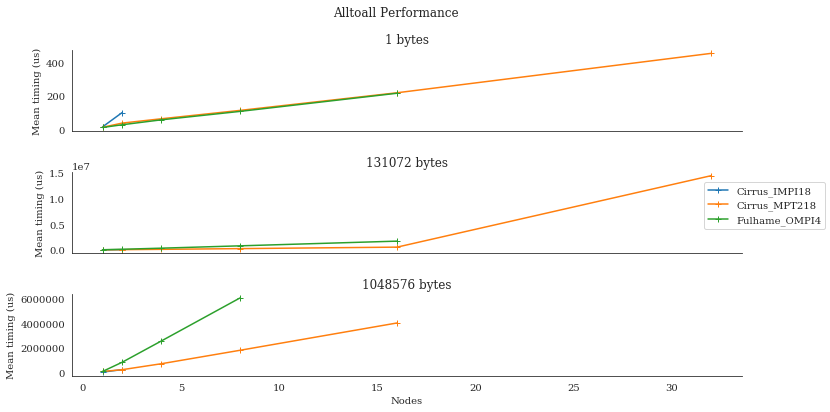

In [24]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('Alltoall Performance')
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_scaling(nodelist, size, a2a_perf[system]), '-+', label=system)
        ax.set(title="{0} bytes".format(size), ylabel="Mean timing (us)")
        handles, labels = ax.get_legend_handles_labels()
        sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='center right')

In [21]:
baseline = 'ARCHER_CrayMPICH'
systems = ['Cirrus_IMPI18', 'Cirrus_MPT218', 'Fulhame_OMPI4']
nodelist = [1, 2, 4, 8, 16, 32]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304 ]
print("Performance relative to ARCHER Cray MPICH")
a2a_ratio = imb.analyse_perf_matrix('ARCHER_CrayMPICH', systems, nodelist, sizelist, a2a_perf, invert=True)           

Performance relative to ARCHER Cray MPICH
            #nodes
      #bytes         1         2         4         8        16        32
Cirrus_IMPI18
           0      0.50      0.64      0.00      0.00      0.00      0.00
           1      0.52      0.18      0.00      0.00      0.00      0.00
           2      0.52      0.19      0.00      0.00      0.00      0.00
           4      0.50      0.18      0.00      0.00      0.00      0.00
           8      0.49      0.17      0.00      0.00      0.00      0.00
          16      0.48      0.16      0.00      0.00      0.00      0.00
          32      0.48      0.63      0.00      0.00      0.00      0.00
          64      0.47      0.56      0.00      0.00      0.00      0.00
         128      0.48      0.13      0.00      0.00      0.00      0.00
         256      0.49      0.32      0.00      0.00      0.00      0.00
         512      0.52      0.40      0.00      0.00      0.00      0.00
        1024      0.65      0.29      0.00      0

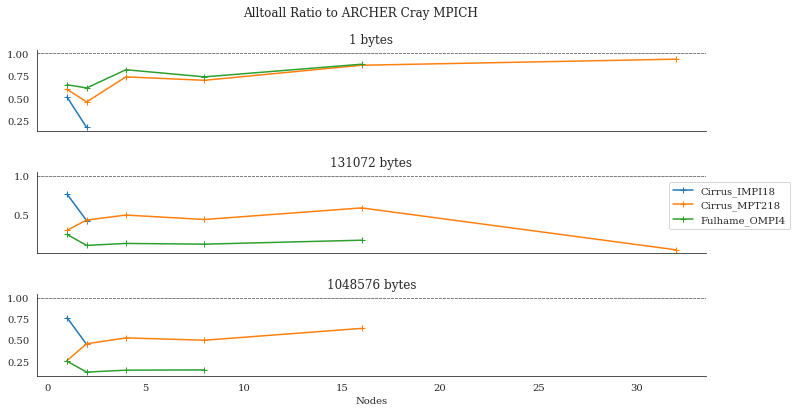

In [22]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('Alltoall Ratio to ARCHER Cray MPICH')
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_scaling(nodelist, size, a2a_ratio[system]), '-+', label=system)
        ax.axhline(y=1, c='gray', ls='--', lw=0.75)
        ax.set(title="{0} bytes".format(size))
        handles, labels = ax.get_legend_handles_labels()
        sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='center right')